In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.tree import export_graphviz
from IPython.display import Image
from sklearn.preprocessing import LabelEncoder
import pydotplus

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_excel('C:/Users/karan/Desktop/Projects/Datas/cars.xls')

In [3]:
df.head()

,Price,Mileage,Make,Model,Trim,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather
0,17314.103129,8221,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,1
1,17542.036083,9135,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
2,16218.847862,13196,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
3,16336.913140,16342,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,0
4,16339.170324,19832,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,1


In [4]:
df.columns

Index(['Price', 'Mileage', 'Make', 'Model', 'Trim', 'Type', 'Cylinder',
       'Liter', 'Doors', 'Cruise', 'Sound', 'Leather'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 804 entries, 0 to 803
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Price     804 non-null    float64
 1   Mileage   804 non-null    int64  
 2   Make      804 non-null    object 
 3   Model     804 non-null    object 
 4   Trim      804 non-null    object 
 5   Type      804 non-null    object 
 6   Cylinder  804 non-null    int64  
 7   Liter     804 non-null    float64
 8   Doors     804 non-null    int64  
 9   Cruise    804 non-null    int64  
 10  Sound     804 non-null    int64  
 11  Leather   804 non-null    int64  
dtypes: float64(2), int64(6), object(4)
memory usage: 75.5+ KB


In [6]:
df.isnull().sum()

Price       0
Mileage     0
Make        0
Model       0
Trim        0
Type        0
Cylinder    0
Liter       0
Doors       0
Cruise      0
Sound       0
Leather     0
dtype: int64

In [7]:
df.shape

(804, 12)

In [8]:
df.duplicated().sum()

np.int64(0)

Price


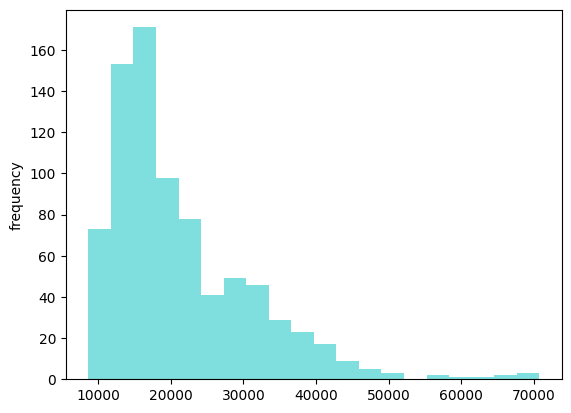

Mileage


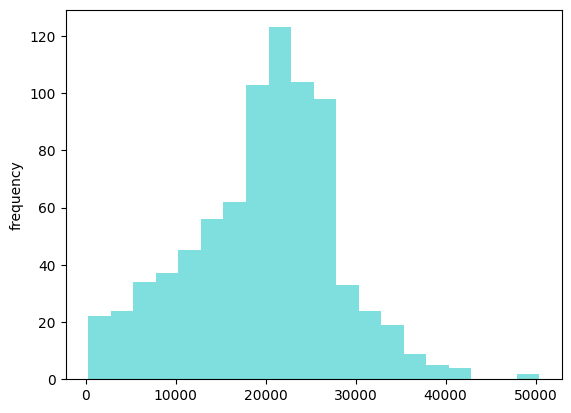

In [9]:
for col in ['Price', 'Mileage']:
    print(col)
    plt.subplot(1,1,1)
    df[col].plot(kind='hist', alpha = 0.5,bins = 20, color = 'c')
    plt.ylabel('frequency')
    plt.show()

In [10]:
x = df[['Mileage','Price']]
y = df['Doors']

In [11]:
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.2)

In [12]:
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

DecisionTreeClassifier()

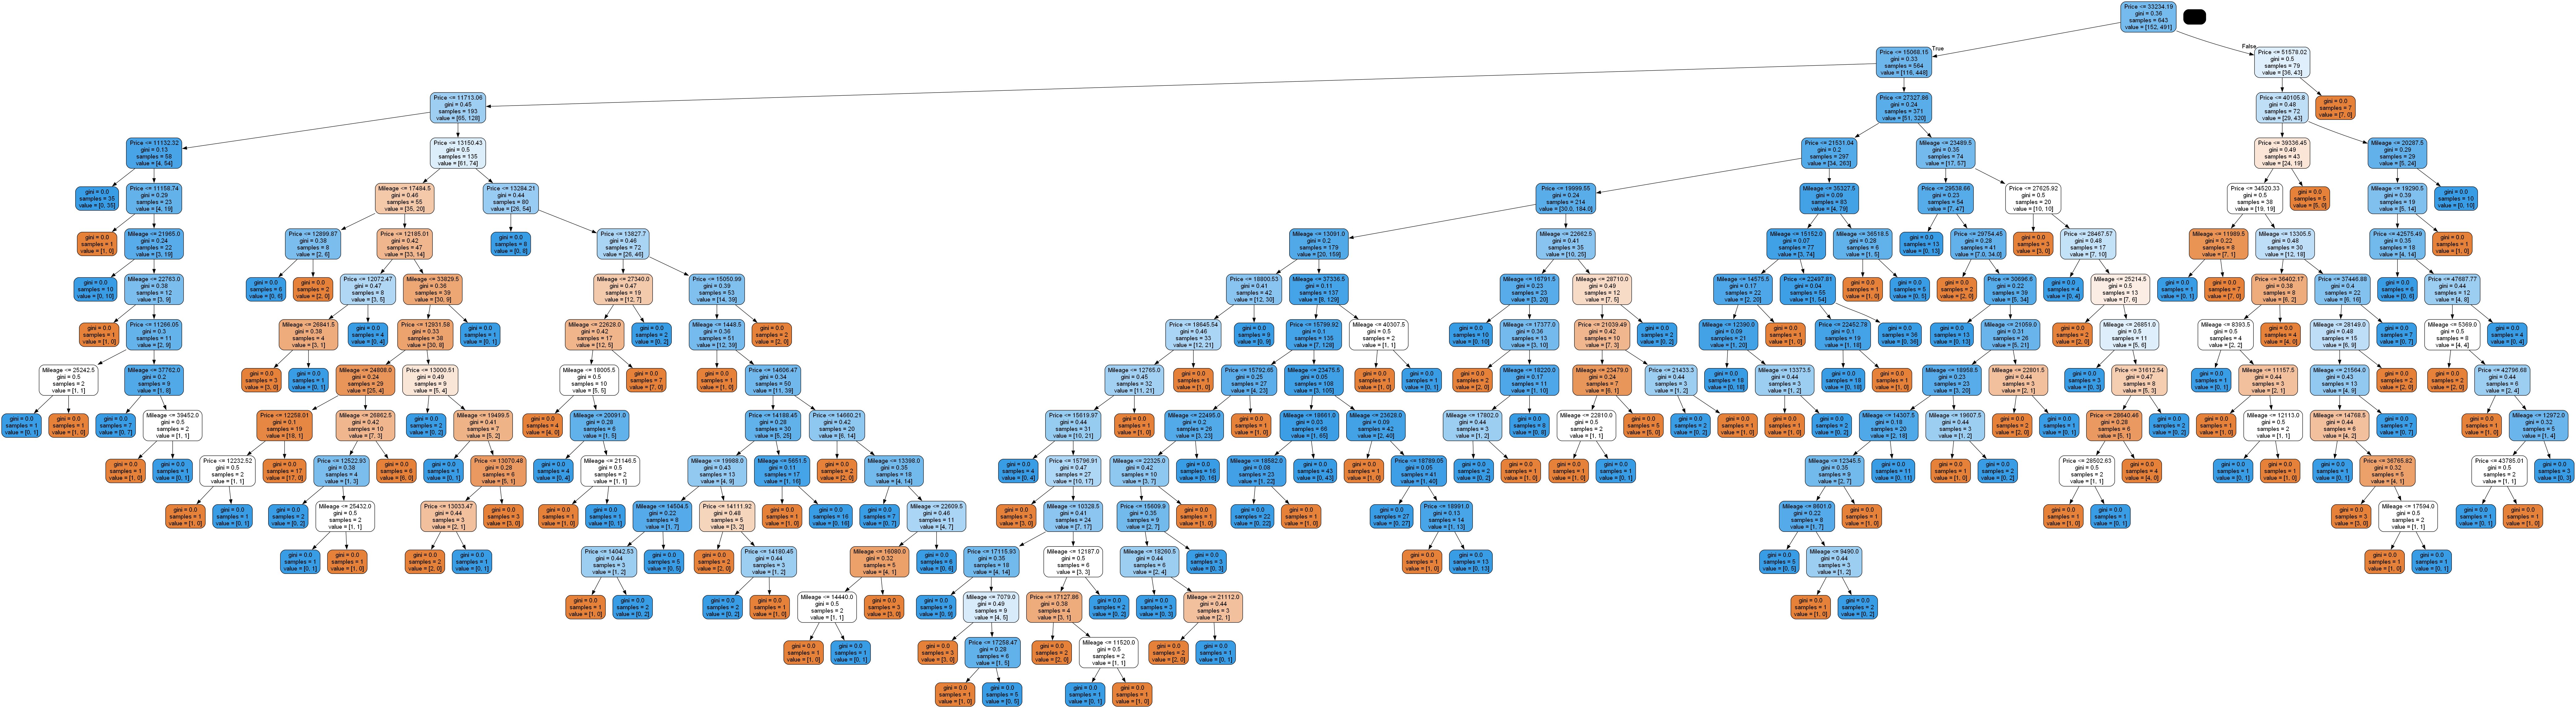

In [13]:
dot_data = export_graphviz(model, out_file=None, feature_names=X_train.columns, rounded =True, proportion = False, precision = 2, filled = True)

graph = pydotplus.graph_from_dot_data(dot_data)

Image(graph.create_png())

In [14]:
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
print("Accuracy: ", accuracy)
print("classification_report: ", classification_rep)
print("confusion Matrix: ", conf_matrix)

Accuracy:  0.7142857142857143
classification_report:                precision    recall  f1-score   support

           2       0.40      0.42      0.41        38
           4       0.82      0.80      0.81       123

    accuracy                           0.71       161
   macro avg       0.61      0.61      0.61       161
weighted avg       0.72      0.71      0.72       161

confusion Matrix:  [[16 22]
 [24 99]]


In [15]:
new = [[8222, 18000]]
y_pred_new = model.predict(new)
print(y_pred_new)

[4]
